In [1]:
import pandas as pd

## Sumber Data: ASEANStatsDataPortal

Analisis data ini mengungkap arus modal asing di lima negara ASEAN yaitu Indonesia, Malaysia, Singapura, Thailand, dan Filipina (ASEAN-5) pada tahun 2020

Arus Foreign Direct Investment (FDI) untuk lima sektor terbesar di setiap negara

In [2]:
df = pd.read_csv("data/fdi-inflow.csv", header=1)
df.head()

,Source Country,Sector,2015,2016,2017,2018,2019,2020
0,Indonesia [ID],"[A] Agriculture, forestry, and fishing",0.15,0.05,-0.02,0.18,0.05,0.12
1,NaN,[B] Mining and quarrying,408.04,38.59,204.08,304.74,228.03,169.54
2,NaN,[C] Manufacturing,115.09,15.78,-42.73,0.00,0.00,0.00
3,NaN,"[D] Electricity, gas, steam and air conditioni...",1.38,0.45,4.91,2.05,0.50,2.89
4,NaN,"[E] Water supply; sewerage, waste management a...",0.01,0.25,0.29,0.33,0.12,0.05


# Data Cleaning

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.columns

Index(['Source Country', 'Sector', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

In [5]:
df_2020 = df[["Source Country", "Sector", "2020"]]

In [6]:
df_2020["Industry_Code"] = df_2020["Sector"].str[:3]

In [7]:
df_2020["Sector"] = df_2020["Sector"].str[3:]

In [8]:
df_2020 = df_2020[df_2020["Industry_Code"] != "[99"]

In [9]:
df_2020["Source Country"] = df_2020["Source Country"].fillna(method = 'ffill')

In [10]:
df_2020

,Source Country,Sector,2020,Industry_Code
0,Indonesia [ID],"Agriculture, forestry, and fishing",0.12,[A]
1,Indonesia [ID],Mining and quarrying,169.54,[B]
2,Indonesia [ID],Manufacturing,0.00,[C]
3,Indonesia [ID],"Electricity, gas, steam and air conditioning ...",2.89,[D]
4,Indonesia [ID],"Water supply; sewerage, waste management and ...",0.05,[E]
...,...,...,...,...
99,Thailand [TH],Education,-4.55,[P]
100,Thailand [TH],Human health and social work activities,-8.62,[Q]
101,Thailand [TH],"Arts, entertainment and recreation",0.18,[R]
102,Thailand [TH],Other services activities.,0.00,[S]


In [11]:
df_2020 = df_2020[["Source Country", "Sector", "2020"]]
df_2020 = df_2020.rename(columns = {"2020":"FDI"})

In [12]:
df_2020["FDI"] = df_2020["FDI"].str.replace(' ', '')
df_2020["FDI"] = df_2020["FDI"].astype("float64")

In [13]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 103
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Source Country  100 non-null    object 
 1   Sector          100 non-null    object 
 2   FDI             100 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


### Indonesia

In [14]:
import matplotlib.pyplot as plt

In [15]:
def largest_5_sector_inflows(data, column1, column2, country_name):
    result = data[data[column1] == country_name]
    final_result = result.nlargest(5, [column2])
    return final_result

In [16]:
def vis_dat(data, height = 'FDI', x = 'Sector'):
    plt.bar(data = data, height=height, x=x)
    plt.xticks(rotation = 88)
    plt.title("5 Sektor dengan arus FDI terbesar (dalam juta US$)")
    !

In [17]:
ind_5_largest = largest_5_sector_inflows(data = df_2020, column1 = 'Source Country', column2 = 'FDI', country_name = 'Indonesia [ID]')

In [18]:
ind_5_largest

,Source Country,Sector,FDI
6,Indonesia [ID],Wholesale and retail trade; repair of motor v...,245.11
1,Indonesia [ID],Mining and quarrying,169.54
10,Indonesia [ID],Financial and Insurance activities,159.95
9,Indonesia [ID],Information and communication,64.75
11,Indonesia [ID],Real estate activities,9.48


In [19]:
ind_5_largest["FDI"].sum()

648.8299999999999

Rata-rata FDI lima sektor terbesar berjumlah US$ 648.82 juta

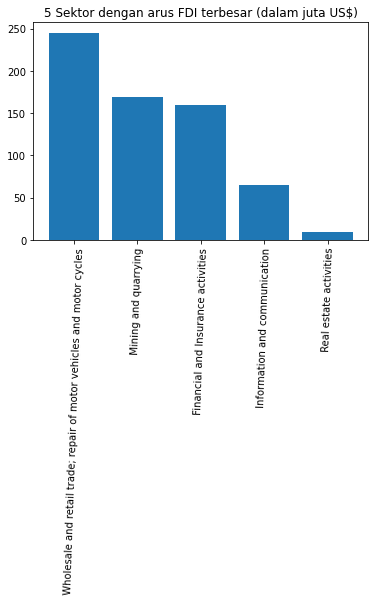

In [20]:
vis_dat(ind_5_largest)

FDI Indonesia berada pada sektor perdagangan besar, perbaikan kendaraan bermotor, pertambangan dan penggalian, keuangan, IT, dan real estate

### Malaysia

In [21]:
mas_5_largest = largest_5_sector_inflows(data = df_2020, column1 = 'Source Country', column2 = 'FDI', country_name = 'Malaysia [MY]')
mas_5_largest

,Source Country,Sector,FDI
31,Malaysia [MY],Financial and Insurance activities,2539.67
32,Malaysia [MY],Real estate activities,316.89
27,Malaysia [MY],Wholesale and retail trade; repair of motor v...,119.21
39,Malaysia [MY],Other services activities.,29.14
22,Malaysia [MY],Mining and quarrying,26.94


In [22]:
mas_5_largest["FDI"].sum()

3031.85

Jauh lebih tinggi dibanding Indonesia, FDI yang mengalir ke Malaysia senilai US$ 3031.85 Juta

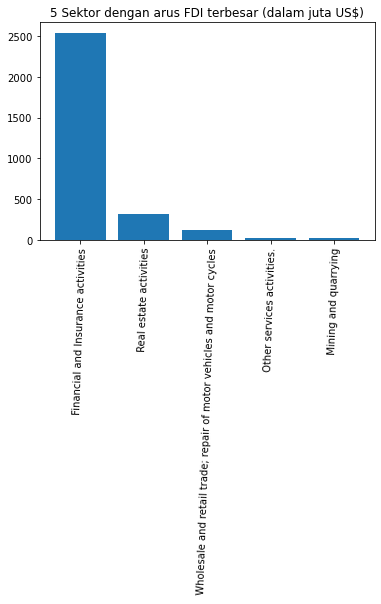

In [23]:
vis_dat(mas_5_largest)

FDI Malaysia berada pada sektor keuangan

### Philippines

In [24]:
phi_5_largest = largest_5_sector_inflows(data = df_2020, column1 = 'Source Country', column2 = 'FDI', country_name = 'Philippines [PH]')
phi_5_largest

,Source Country,Sector,FDI
48,Philippines [PH],Wholesale and retail trade; repair of motor v...,37.33
45,Philippines [PH],"Electricity, gas, steam and air conditioning ...",30.72
53,Philippines [PH],Real estate activities,29.00
52,Philippines [PH],Financial and Insurance activities,16.97
49,Philippines [PH],Transportation and storage,11.65


In [25]:
phi_5_largest["FDI"].sum()

125.67

Filipina menjadi negara yang kurang diminati oleh investor asing dengan nilai FDI terendah yaitu sebesar US$ 125.67 Juta

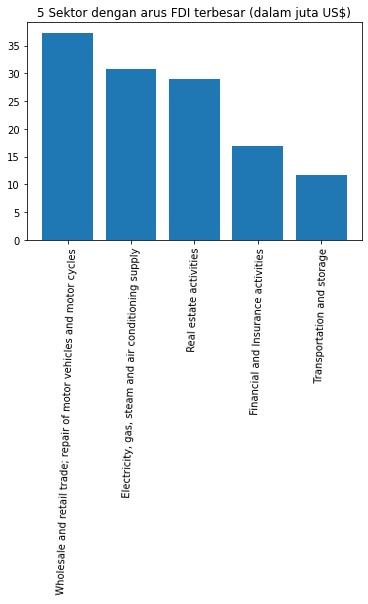

In [26]:
vis_dat(phi_5_largest)

Persebaran sektor arus FDI di filipina hampir merata untuk 5 sektor terbesar. Namun, sektor listrik, gas, dan AC menjadi sektor pembeda untuk negara Indonesia dan Malaysia

### Singapore

In [27]:
sin_5_largest = largest_5_sector_inflows(data = df_2020, column1 = 'Source Country', column2 = 'FDI', country_name = 'Singapore [SG]')
sin_5_largest

,Source Country,Sector,FDI
65,Singapore [SG],Manufacturing,3435.32
73,Singapore [SG],Financial and Insurance activities,2646.62
69,Singapore [SG],Wholesale and retail trade; repair of motor v...,1931.35
74,Singapore [SG],Real estate activities,1534.35
66,Singapore [SG],"Electricity, gas, steam and air conditioning ...",987.24


In [28]:
sin_5_largest["FDI"].sum()

10534.880000000001

In [29]:
sin_5_largest["FDI"].sum()/phi_5_largest["FDI"].sum()

83.82971273971513

Nilai FDI singapura mencapai 83.82 kali nilai FDI Filipina, sebesar US$ 10534.8 Juta

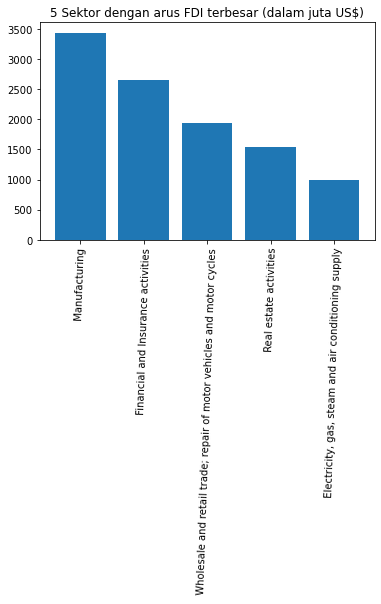

In [30]:
vis_dat(sin_5_largest)

Sektor manufaktur menjadi pilihan investor asing ke Singapura

### Thailand

In [31]:
tha_5_largest = largest_5_sector_inflows(data = df_2020, column1 = 'Source Country', column2 = 'FDI', country_name = 'Thailand [TH]')
tha_5_largest

,Source Country,Sector,FDI
94,Thailand [TH],Financial and Insurance activities,3108.77
90,Thailand [TH],Wholesale and retail trade; repair of motor v...,790.51
86,Thailand [TH],Manufacturing,472.61
85,Thailand [TH],Mining and quarrying,286.69
87,Thailand [TH],"Electricity, gas, steam and air conditioning ...",212.87


In [32]:
tha_5_largest["FDI"].sum()

4871.449999999999

sebesar US$ 4871.44 nilai FDI 5 sektor terbsesar mengalir ke Thailand

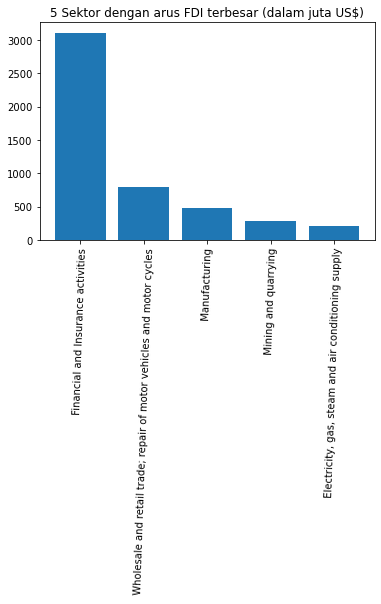

In [33]:
vis_dat(tha_5_largest)

Arus FDI ke Thailand, terbesar mengalir ke sektor keuangan, sama dengan malaysia